<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Tugas *2*: *Classification***

###**Tenggat Waktu: 19 November 2022, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dataset yang digunakan pada tugas ini beserta deskripsinya telah disediakan di SCeLe.
2. Buatlah program Jupyter Notebook yang menjawab pertanyaan sesuai dengan perintah soal yang disediakan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_Tugas2_NPM_Nama.ipynb**. Contoh: A_Tugas2_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **19 November 2022, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Praktikum ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [ ]:
# Isi dengan data diri Anda
NAMA = "Bonifasius Erlangga Einsoni Rienko"
KELAS = "B"
NPM = "1906302850"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [ ]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Bonifasius Erlangga Einsoni Rienko dari kelas B dengan NPM 1906302850, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Bonifasius Erlangga Einsoni Rienko)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

## **Dataset**

Dataset yang digunakan adalah dataset Mobile Prices dimana kita memklasifikasi handphone lewat harganya, terdapat 21 atribut dan target atributnya adalah price_range.

Penjelesan atribut:
* battery_power : Total energy a battery can store in one time measured in mAh
* blue : Has bluetooth or not
* clock_speed : speed at which microprocessor executes instructions
* dual_sim : Has dual sim support or not
* fc : Front Camera mega pixels
* four_g : Has 4G or not
* int_memory : Internal Memory in Gigabytes
* m_dep : Mobile Depth in cm
* mobile_wt : Weight of mobile phone
* n_cores : Number of cores of processor
* pc : Primary Camera mega pixels
* px_height : Pixel Resolution Height
* px_width : Pixel Resolution Width
* ram : Random Access Memory in Mega Bytes
* sc_h : Screen Height of mobile in cm
* sc_w : Screen Width of mobile in cm
* talk_time : Longest time that a single battery charge will last when you are
* three_g : Has 3G or not
* touch_screen : Has touch screen or not
* wifi : Has wifi or not
* price_range : This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

Sumber: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification (dengan modifikasi)

## [25] **Preprocessing**

**Pada bagian ini Anda akan diminta untuk melakukan preprocessing dan eksplorasi data sebelum data digunakan dalam model klasifikasi.**

1\. [3] Berikan ringkasan mengenai data tersebut terkait dengan deskripsi setiap atribut, jumlah missing values, jumlah duplikasi data, dan kemungkinan adanya outliers pada data!

Yang pertama adalah deskripsi mengenai dataset secara keseluruhan dan data type untuk masing-masing atribut

In [ ]:
df = pd.read_csv("mobile_phone.csv")

In [ ]:
df.describe

<bound method NDFrame.describe of       battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0         7.0   
1              1021     1          0.5         1   0       1        53.0   
2               563     1          0.5         1   2       1        41.0   
3               615     1          2.5         0   0       0        10.0   
4              1821     1          1.2         0  13       1        44.0   
...             ...   ...          ...       ...  ..     ...         ...   
2016            794     1          0.5         1   0       1         2.0   
2017           1965     1          2.6         1   0       0        39.0   
2018           1911     0          0.9         1   1       1        36.0   
2019           1512     0          0.9         0   4       1        46.0   
2020            510     1          2.0         1   5       1        45.0   

      m_dep  mobile_wt  n_cores  ...  px_height  px_w

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021 entries, 0 to 2020
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2021 non-null   int64  
 1   blue           2021 non-null   int64  
 2   clock_speed    1920 non-null   float64
 3   dual_sim       2021 non-null   int64  
 4   fc             2021 non-null   int64  
 5   four_g         2021 non-null   int64  
 6   int_memory     1915 non-null   float64
 7   m_dep          1928 non-null   float64
 8   mobile_wt      2021 non-null   int64  
 9   n_cores        2021 non-null   int64  
 10  pc             2021 non-null   int64  
 11  px_height      2021 non-null   int64  
 12  px_width       2021 non-null   int64  
 13  ram            1927 non-null   float64
 14  sc_h           2021 non-null   int64  
 15  sc_w           2021 non-null   int64  
 16  talk_time      1937 non-null   float64
 17  three_g        2021 non-null   int64  
 18  touch_sc

Berikutnya adalah jumlah missing value untuk masing-masing atribut

In [ ]:
df.isnull().sum().sort_values(ascending=False)

int_memory       106
clock_speed      101
wifi              99
touch_screen      96
ram               94
m_dep             93
talk_time         84
battery_power      0
px_width           0
three_g            0
sc_w               0
sc_h               0
pc                 0
px_height          0
blue               0
n_cores            0
mobile_wt          0
four_g             0
fc                 0
dual_sim           0
price_range        0
dtype: int64

Berikut adalah jumlah duplikasi data

In [ ]:
duplikasi = df.duplicated().sum()
print("Terdapat "+str(duplikasi)+" duplikasi pada data")

Terdapat 21 duplikasi pada data


Berikut adalah jumlah outlier untuk masing-masing atribut

In [ ]:
def outlier_counter(data):
    global q1
    global q3
    global iqr
    q1 = data.quantile(q = 0.25)
    q3 = data.quantile(q = 0.75)
    iqr = q3 - q1
    hasil = ((data < (q1 - 1.5 * iqr)) | (data > (q3 + 1.5 * iqr))).sum()
    return hasil

In [ ]:
print(outlier_counter(df))

battery_power      0
blue               0
clock_speed        0
dual_sim           0
fc                18
four_g             0
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc                 0
px_height          2
px_width           0
ram                0
sc_h               0
sc_w               0
talk_time          0
three_g          480
touch_screen       0
wifi               0
price_range        0
dtype: int64


2\. [3] Berdasarkan eksplorasi anda pada nomor 1, lakukan data preparation hingga data tersebut menurut anda cukup “clean” dan dapat memberikan hasil klasifikasi yang maksimal.

In [ ]:
mobile_phone = df.copy()
# Clear outlier data from dataset
mobile_phone = mobile_phone[~((mobile_phone < (q1 - 1.5 * iqr)) |(mobile_phone > (q3 + 1.5 * iqr))).any(axis=1)]
outlier_counter(mobile_phone)

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
#drop duplicate
mobile_phone = mobile_phone.drop_duplicates()
duplikasi = mobile_phone.duplicated().sum()
print("Terdapat "+str(duplikasi)+" duplikasi pada data")

Terdapat 0 duplikasi pada data


In [ ]:
#drop missing value
mobile_phone = mobile_phone.dropna()
mobile_phone.isnull().sum().sort_values(ascending=False)

battery_power    0
px_height        0
wifi             0
touch_screen     0
three_g          0
talk_time        0
sc_w             0
sc_h             0
ram              0
px_width         0
pc               0
blue             0
n_cores          0
mobile_wt        0
m_dep            0
int_memory       0
four_g           0
fc               0
dual_sim         0
clock_speed      0
price_range      0
dtype: int64

3\. [3] Menurut Anda, apakah perlu dilakukan normalisasi terhadap data, atau cukup menggunakan data asli? Jika ya, bentuk normalisasi apa yang tepat digunakan pada data? Jelaskan secara singkat alasan Anda!


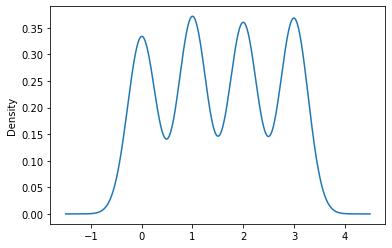

In [ ]:
mobile_phone['price_range'].plot(kind='kde')

> Jawaban: 

> Menurut saya perlu dilakukan normalisasi, alasannya adalah supaya kita bisa mendapatkan hasil yang optimal. Karena dengan melakukan normalisasi, setidaknya data dapat ditangani dengan lebih baik walaupun distribusinya tidak terlalu bagus (tidak terdistribusi secara normal) dan tidak ada suatu unsur yang tidak relevan pada data yang dapat merusak atau menurunkan tingkat analisis pada data. Contohnya pada gambar diatas, dapat kita lihat bahwa data terdisribusi tidak normal (branch distribution) sehingga mungkin lebih baik kalau kita lakukan normalisasi. Normalisasi yang saya pilih adalah StandardScaler karena semua outlier sudah ditangani dan rangenya lebih luas dibandingan MinMaxScaler.

4\. [10] Sebelum data diproses lebih lanjut lakukan *feature selection* dengan memilih beberapa fitur yang paling optimal untuk mengklasifikasikan label target!

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X_raw = mobile_phone.drop(["price_range"],axis=1)
y = mobile_phone["price_range"]


selector = SelectKBest(f_classif, k=7) 

X = selector.fit_transform(X_raw, y)
X.shape[1]

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [17] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


7

5\. [6] Apa saja fitur-fitur yang terpilih hasil dari *feature selection*? Jelaskan strategi Anda dalam memilih fitur-fitur tersebut dan berikan analisis mengapa fitur tersebut cocok digunakan untuk mengklasifikasi label target!

In [ ]:
input_features = selector.feature_names_in_
selector.get_feature_names_out(input_features=input_features)

array(['battery_power', 'four_g', 'int_memory', 'mobile_wt', 'px_height',
       'px_width', 'ram'], dtype=object)

Untuk sementara, saya akan memilih 7 fitur dengan targetnya adalah price_range. 7 gitur tersebut adalah 'battery_power', 'four_g', 'int_memory', 'mobile_wt', 'px_height','px_width', 'ram'. Alasan memilih tersebut karena berdasarkan SelectKBest

## [75] **Classification**

**Pada bagian ini Anda akan diminta untuk melakukan klasifikasi harga suatu mobile phone berdasarkan fitur-fitur yang sudah Anda pilih sebelumnya. Anda akan mencoba berbagai macam model klasifikasi seperti Decision Tree, Random Forest, Naive Bayes, dan K-nearest Neighbors untuk mencari model yang memiliki performa terbaik.**

### [3] Preparation

6\. [3] Buatlah model K-Fold Cross Validation yang akan digunakan untuk membagi dataset train dan test menjadi beberapa bagian (*fold*). Strategi ini akan Anda gunakan pada semua *classifier* dibandingkan dengan strategi sebelumnya yang hanya membagi data ke dalam data training dan testing menggunakan method `train_test_split`.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt

#split target and feature
target = mobile_phone['price_range']
feature = mobile_phone[['battery_power', 'four_g', 'int_memory', 'mobile_wt', 'px_height','px_width', 'ram']]

#melakukan standardscaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(feature)
norm = pd.DataFrame(scaled_data, columns=feature.columns)
mobile_phone_classification = pd.concat([norm.reset_index(drop=True), target.reset_index(drop=True)], axis=1)

X_mobile_phone_classification = mobile_phone_classification.drop(['price_range'], axis=1)
y_mobile_phone_classification = mobile_phone_classification['price_range']

cv = KFold(n_splits=10, random_state=1, shuffle=True)

model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model, X_mobile_phone_classification, y_mobile_phone_classification)

print(mean(absolute(scores)))

0.9099662719348354


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report, silhouette_score, mean_squared_error ,mean_absolute_error, r2_score, make_scorer, roc_auc_score, ConfusionMatrixDisplay

X_train,X_test,y_train,y_test=train_test_split(X_mobile_phone_classification,y_mobile_phone_classification,test_size=0.2,random_state=123)

def evaluate_classifier_performance(classifier, prediction, y_test = y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi:\n\n%s\n" % (classification_report(y_test, classifier.predict(X_test))))

    # Butuh informasi lebih lengkap? silakan disimak di bawah ini
    print('Accuracy:', accuracy_score(y_test, prediction))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro'))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro'))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro'))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro'))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))

    # Confusion Matrix
    print("\n\nConfusion Matrix\n")
    ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)

### [19] Decision Tree

7\. [4] Implementasikan model Decision Tree tanpa konfigurasi parameter apapun, serta berikan hasil evaluasinya!

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

classifier_dt = DecisionTreeClassifier(max_depth = 10, random_state = 2021)
classifier_dt.fit(X_train, y_train)
prediction_dt = classifier_dt.predict(X_test)

Hasil Evaluasi:

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        41
           1       0.74      0.78      0.76        58
           2       0.69      0.80      0.74        46
           3       0.96      0.82      0.88        55

    accuracy                           0.80       200
   macro avg       0.81      0.79      0.80       200
weighted avg       0.81      0.80      0.80       200


Accuracy: 0.795
Precision Macro Average: 0.8056105437216263
Precision Micro Average: 0.795
Recall Macro Average: 0.7947198795280852
Recall Micro Average: 0.795
F1 Macro Average: 0.7971955111158388
F1 Micro Average: 0.795


Confusion Matrix



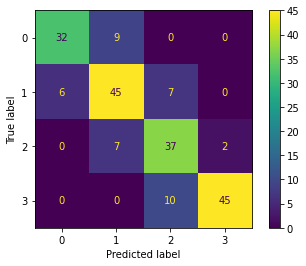

In [ ]:
evaluate_classifier_performance(classifier_dt, prediction_dt)

8\. [4] Implementasikan model Decision Tree dengan memberikan parameter nilai `min_samples_leaf=50`; serta berikan hasil evaluasinya!

Hasil Evaluasi:

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        41
           1       0.73      0.83      0.77        58
           2       0.77      0.80      0.79        46
           3       0.96      0.89      0.92        55

    accuracy                           0.82       200
   macro avg       0.83      0.81      0.82       200
weighted avg       0.83      0.82      0.82       200


Accuracy: 0.82
Precision Macro Average: 0.829008307868602
Precision Micro Average: 0.82
Recall Macro Average: 0.8136376102414424
Recall Micro Average: 0.82
F1 Macro Average: 0.8188573942594017
F1 Micro Average: 0.82


Confusion Matrix



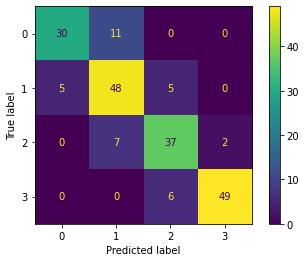

In [ ]:
classifier_dt = DecisionTreeClassifier(max_depth = 10, random_state = 2021, min_samples_leaf=5)
classifier_dt.fit(X_train, y_train)
prediction_dt = classifier_dt.predict(X_test)
evaluate_classifier_performance(classifier_dt, prediction_dt)

In [ ]:
# https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-models-c91c65d73af
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def metrics(prediction):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

In [ ]:
metrics(prediction_dt)

MAE: 0.18
MSE: 0.18
RMSE: 0.4242640687119285
R_squared: 0.8505448884276077


9\. [6] Bandingkan model yang dibuat pada soal nomor 7 dan nomor 8, manakah yang lebih baik? Berikan analisis Anda terkait bagaimana hubungan perubahan parameter tersebut dengan kualitas hasil klasifikasi!

> Jawaban: 

> Ketika menambahkan parameter min_samples_leaf=50 hasil akurasinya meningkat menjadi 0.82 dari yang sebelumnya 0.795

10\. [5] Buatlah model yang memiliki performa yang lebih bagus dibanding kedua model sebelumnya! Anda dibebaskan untuk melakukan eksplorasi dalam mengkonfigurasi parameter yang dipakai.

Hasil Evaluasi:

              precision    recall  f1-score   support

           0       0.89      0.80      0.85        41
           1       0.80      0.83      0.81        58
           2       0.73      0.87      0.79        46
           3       0.96      0.84      0.89        55

    accuracy                           0.83       200
   macro avg       0.84      0.83      0.84       200
weighted avg       0.85      0.83      0.84       200


Accuracy: 0.835
Precision Macro Average: 0.8443744881244882
Precision Micro Average: 0.835
Recall Macro Average: 0.8345982773579951
Recall Micro Average: 0.835
F1 Macro Average: 0.8362490649009205
F1 Micro Average: 0.835


Confusion Matrix



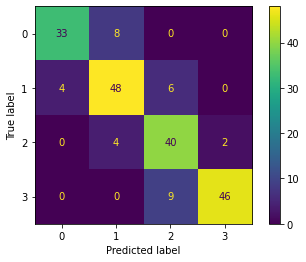

In [ ]:
classifier_dt = DecisionTreeClassifier(max_depth = 10, random_state = 2021, min_samples_leaf=10, criterion='gini', splitter='best')
classifier_dt.fit(X_train, y_train)
prediction_dt = classifier_dt.predict(X_test)
evaluate_classifier_performance(classifier_dt, prediction_dt)

In [ ]:
metrics(prediction_dt)

MAE: 0.165
MSE: 0.165
RMSE: 0.406201920231798
R_squared: 0.8629994810586403


### [18] Random Forest

11\. [4] Implementasikan model Random Forest tanpa konfigurasi parameter apapun, serta berikan hasil evaluasinya!

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Melakukan training pada model random forest
rf_md = RandomForestRegressor()
rf_md.fit(X_train, y_train)

# Memprediksi data testing
predicted_rf = rf_md.predict(X_test)

# Menampilkan metrics
metrics(predicted_rf)

MAE: 0.18189999999999998
MSE: 0.08017999999999999
RMSE: 0.28316073174082595
R_squared: 0.9334260508562533


12\. [8] Implementasikan model Random Forest dengan parameter yang didapatkan dari hasil Hyperparameter Tuning, serta berikan hasil evaluasinya!

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
               'min_samples_split': [1,2,3],
              'max_depth' : [7,10]}

rf = RandomForestRegressor()

hyper_rf_md = GridSearchCV(estimator= rf, 
                   param_grid=param_grid, cv= 10)

hyper_rf_md.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [7, 10], 'min_samples_split': [1, 2, 3]})

In [ ]:
hyper_rf_md.best_params_

{'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 2}

In [ ]:
best = RandomForestRegressor(**hyper_rf_md.best_params_)
best.fit(X_train, y_train)
predicted = best.predict(X_test)
metrics(predicted)

MAE: 0.18214137849079026
MSE: 0.0788775446527866
RMSE: 0.28085146368282754
R_squared: 0.9345074875742301


13\. [6] Bandingkan model yang dibuat pada soal nomor 11 dan nomor 12, manakah yang lebih baik? Berikan analisis Anda terkait bagaimana hubungan perubahan parameter tersebut dengan kualitas hasil klasifikasi!

> Jawaban: 

> Dari semua percobaan yang saya lakukan (mengganti beberapa kali parameter di paramgrod) hasilnya masih belum ada yang lebih baik dari yang dihasilkan di nomor 11. Menurut saya, hal tersebut dikarenakan mungkin saja karena pada nomor 12 saya belum menemukan parameter seperti apa yang bisa dimasukkan pada paramgrid yang bisa mengalahkan (hasilnya di MAE lebih rendah) hasil di nomor 11


### [16] Naive Bayes

14\. [4] Implementasikan model dari salah satu variasi Naive Bayes; serta berikan hasil evaluasinya!

In [ ]:
def plot_imbalance_checker(df,columns):
  df[columns].value_counts().plot(kind='bar', xlabel='Status', ylabel='frequency', figsize=(10,5))
  plt.show()

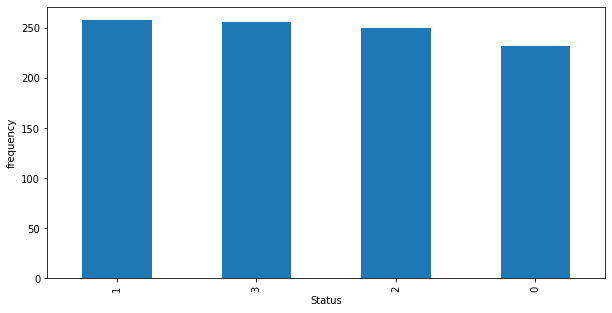

In [ ]:
plot_imbalance_checker(mobile_phone,"price_range")

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

multi_nb = MultinomialNB()
multi_nb.fit(X_train_scaled, y_train)

y_pred = multi_nb.predict(X_test_scaled)

metrics(y_pred)

MAE: 0.545
MSE: 0.735
RMSE: 0.8573214099741123
R_squared: 0.389724961079398


15\. [6] Apa alasan dan pertimbangan Anda dalam memilih variasi tersebut dibandingkan variasi Naive Bayes lainnya? 

> Jawaban:

> Karena jika dibandingan categoricalNB, data yang ingin diolah saat ini bukan merupakan tipe data kategorikal. Kemudian saya rasa juga nilai dari datanya tidak terdistribusi secara binary (sehingga tidak menggunakan bernoulliNB) serta jika kita lihat dia juga tidak terdistribusi secara normal bila kita lihat di bagian atas (sehingga tidak menggunakan gaussian). Selain itu, bila kita lihat juga dari fungsi yang saya jalankan (plot_imbalance_checker) masih ada data imbalance, sehingga kurang bagus kalau kita menggunakan complementDB

16\. [6] Masing-masing variasi Naive Bayes dibuat khusus untuk menyesuaikan tipe data tertentu pada data yang digunakan. Jika data yang ada memiliki tipe fitur yang bervariasi (numerik, biner, kategorik, dll), apakah kita bisa menggunakan salah satu variasi algoritma saja? Bagaimana strategi Anda dalam menganani kasus tersebut?

> Jawaban:

> Mungkin saya dapat melakukan pertama adalah encoding untuk data yang kategorik, kemudian melakukan uniform atau SMOTEN untuk data yang imbalance. Kemudian untuk data yang tidak binary dan yang binary mungkin kita dapat melakukan variasi algoritma (lebih dari satu) misalnya menggunakan bernoulliNB bila ingin mengolah data yang sifatnya binary bila dibutuhkan dan menggunakan complementNB atau multinomialNB (bisa menggunakan complementNB dengan asusmsi data imbalance sudah ditangani) untuk yang bukan binary

### [12] K-nearest Neighbors

17\. [4] Implementasikan model KNN dengan memberikan parameter nilai `n_neighbors=3`; serta berikan hasil evaluasinya!

In [ ]:
# import KNN
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=3) # kita akan menggunakan nilai 5 untuk k terlebih dahulu
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = KNN.predict(X_test)
evaluate_classifier_performance(y_pred,y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.74      0.76      0.75        41
           1       0.57      0.53      0.55        58
           2       0.50      0.63      0.56        46
           3       0.93      0.78      0.85        55

    accuracy                           0.67       200
   macro avg       0.69      0.68      0.68       200
weighted avg       0.69      0.67      0.68       200



Confusion Matrix



prediction,0,1,2,3
actual,,,,
0,31,8,2,0
1,11,31,16,0
2,0,14,29,3
3,0,1,11,43




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.6774342091464542
F1 Micro Average: 0.67
Precision Macro Average: 0.6867379802162411
Precision Micro Average: 0.67
Recall Macro Average: 0.6757083210057943
Recall Micro Average: 0.67



In [ ]:
metrics(y_pred)

MAE: 0.345
MSE: 0.375
RMSE: 0.6123724356957945
R_squared: 0.6886351842241827


18\. [8] Implementasikan model KNN dengan parameter yang didapatkan dari hasil Hyperparameter Tuning, serta berikan hasil evaluasinya!

In [ ]:
# Optimalisasi KNN dengan gridsearch CV

# import Grid Search CV
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier()

# parameter yang akan di tunning
tunned_params = [
  { 
    'n_neighbors': [1,2,3,4,5]
  } 
]

print("##### Tuning hyper-parameters model KNN #####")
print()

clfKNN = GridSearchCV(model, 
                    tunned_params,
                     scoring="accuracy",
                    cv=5,
                   verbose = 2
                    )

clfKNN.fit(X_train_scaled, y_train)

print("Best parameters set found on development set:")
print()
print(clfKNN.best_params_)
print()
print("Detailed classification report:")
print()
y_true, y_pred = y_test, clfKNN.predict(X_test_scaled)
evaluate_classifier_performance(y_pred, y_true)
print()

##### Tuning hyper-parameters model KNN #####

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[C

prediction,0,1,2,3
actual,,,,
0,35,5,1,0
1,10,39,9,0
2,0,9,35,2
3,0,1,11,43




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
F1 Macro Average: 0.7641641424011464
F1 Micro Average: 0.76
Precision Macro Average: 0.7701388888888889
Precision Micro Average: 0.76
Recall Macro Average: 0.7671900191810969
Recall Micro Average: 0.76




In [ ]:
metrics(y_pred)

MAE: 0.25
MSE: 0.27
RMSE: 0.5196152422706632
R_squared: 0.7758173326414115


### [7] Analisis

19\. [7] Dari keempat variasi model (Decision Tree, Random Forest, Naive Bayes, dan KNN) yang sudah Anda coba, manakah model yang memiliki performa terbaik? Berikan analisis Anda!

> Jawaban:

> Dari hasil ini, saya menurut saya yang paling baik adalah yang DecisionTree. Alasannya adalah karena saya melihat dari nilai MAE yang paling kecil. Semakin kecil MAE nya, maka kemungkinan prediksi sesuai dengan aktualnya semakin tinggi.